In [ ]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [ ]:
df  = pd.read_csv("/content/stringency_final (1).csv")
df.head()

,State_Code,Date,StringencyIndex,covid_cases,hate_crimes,hate_tweets
0,AK,2020-02-29,15.328276,0.000000,0.0,0.000000
1,AK,2020-03-31,47.939032,175.064760,0.0,2.735387
2,AK,2020-04-30,86.697333,310.466411,0.0,0.000000
3,AK,2020-05-31,69.355484,147.710891,0.0,2.735387
4,AK,2020-06-30,55.000667,657.860545,0.0,0.000000


# **SUMMARY STATISTICS**

In [ ]:
summary=df.describe().round(2)  # Generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T # Transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
StringencyIndex,650.0,56.12,17.74,5.37,49.07,58.33,66.78,92.93
covid_cases,650.0,6566.89,7501.73,0.00,1176.92,3835.18,8877.12,45226.18
hate_crimes,650.0,0.06,0.16,0.00,0.00,0.00,0.00,1.46
hate_tweets,650.0,0.87,0.80,0.00,0.29,0.73,1.30,5.59


This section tests the 3 assumptions for linear regression to be appropriate: independence, homoscedasticity and multicollinearity:

**A. INDEPENDENCE**

**B. HOMOSCEDASTICITY**

Text(564.2857142857143, 0.5, 'Hate Crimes')

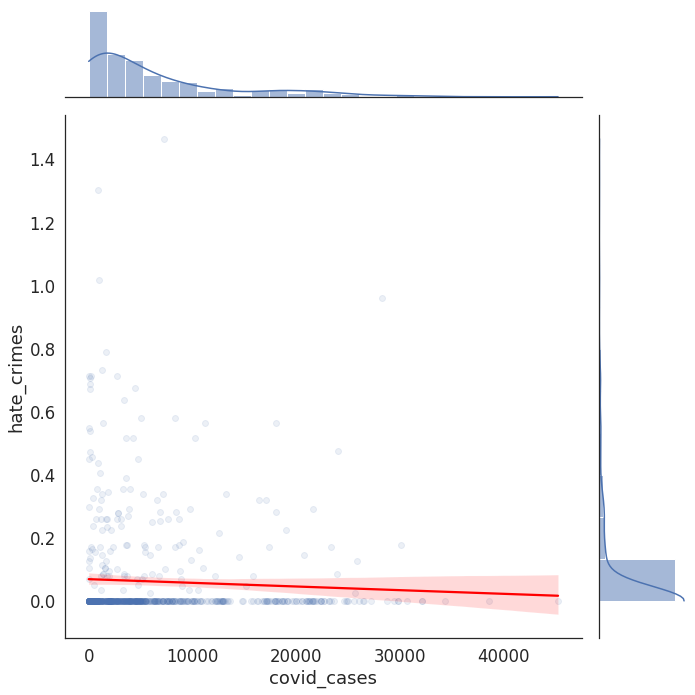

In [ ]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='covid_cases', 
                y='hate_crimes', 
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 
plt.xlabel('COVID Cases') # add a label to the x axis
plt.ylabel('Hate Crimes') # add a label to the y axis

Text(564.2857142857143, 0.5, 'Hate Tweets')

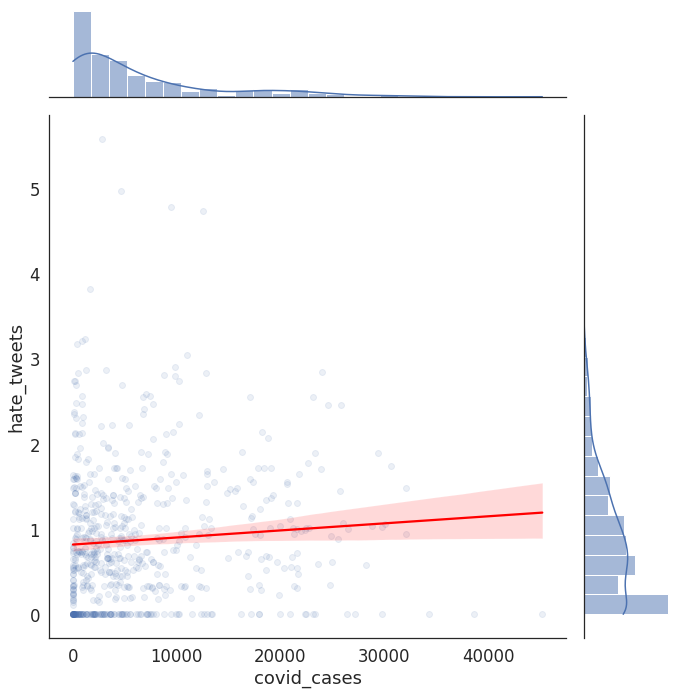

In [ ]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='covid_cases', 
                y='hate_tweets', 
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('COVID Cases') # add a label to the x axis
plt.ylabel('Hate Tweets') # add a label to the y axis

Text(564.2857142857143, 0.5, 'Hate Tweets')

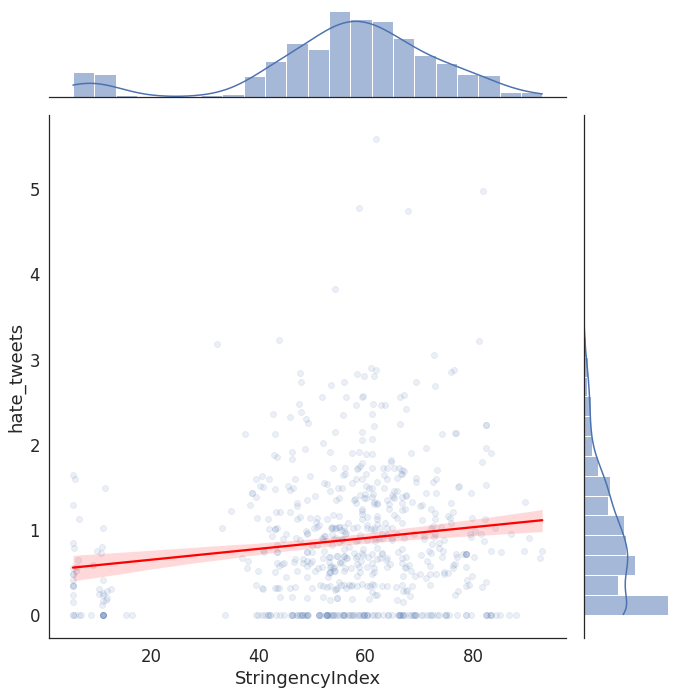

In [ ]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='StringencyIndex', 
                y='hate_tweets', 
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Stringency Index') # add a label to the x axis
plt.ylabel('Hate Tweets') # add a label to the y axis

Text(564.2857142857143, 0.5, 'Hate Crimes')

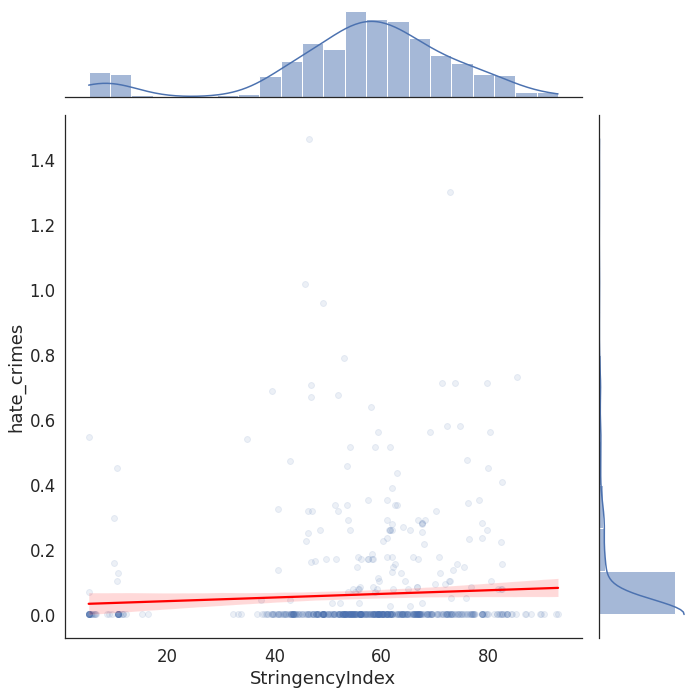

In [ ]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='StringencyIndex', 
                y='hate_crimes', 
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Stringency Index') # add a label to the x axis
plt.ylabel('Hate Crimes') # add a label to the y axis

**FURTHER** **INVESTIGATION**

Further investigation by testing the homoscedasticity assumption using the log of the dependent variable. Creates a histogram of residuals and Q-Q plot that can be compared to the ones from the original dataset.

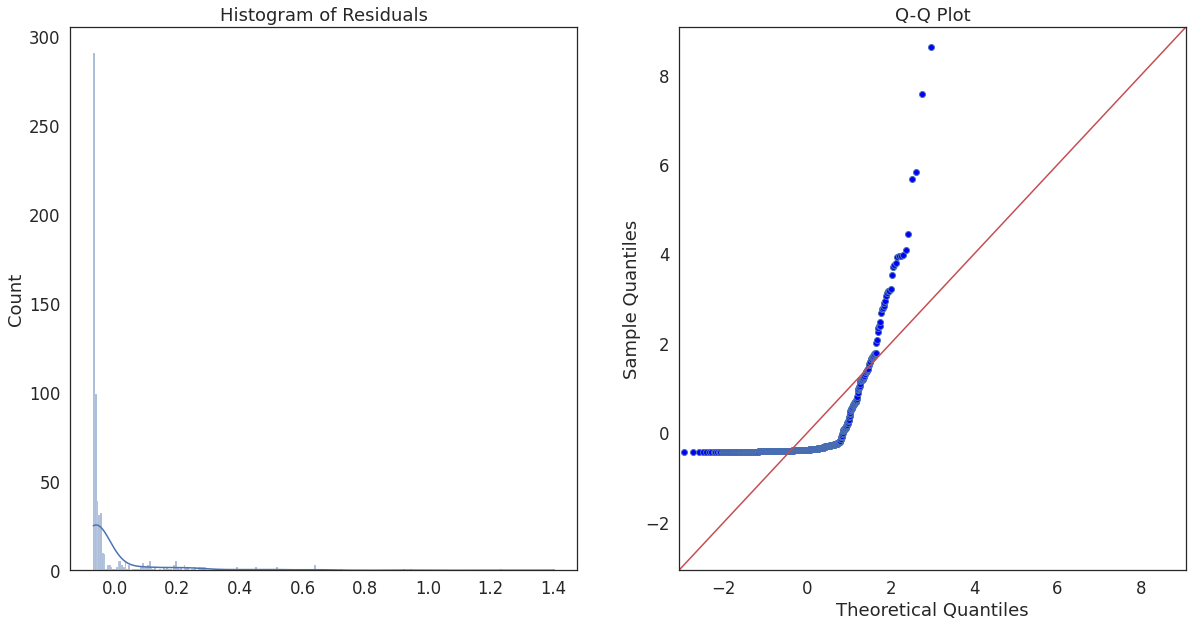

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


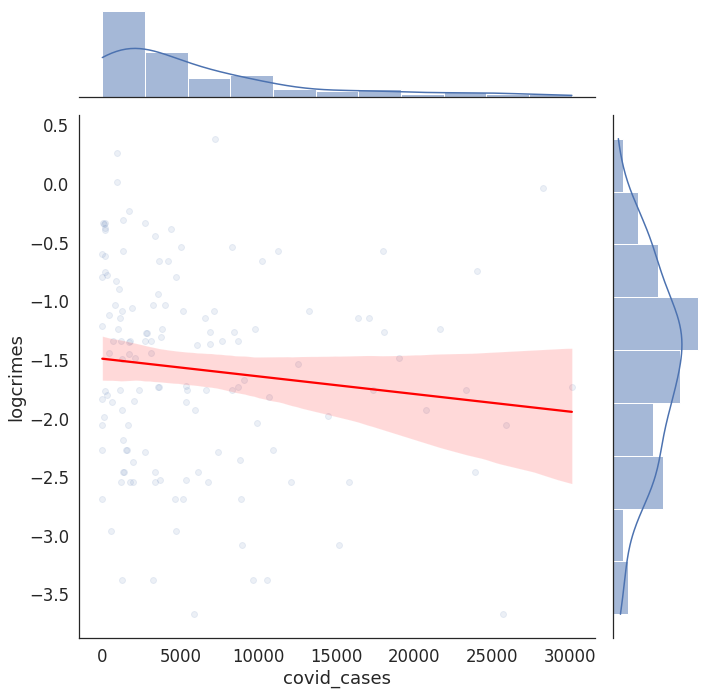

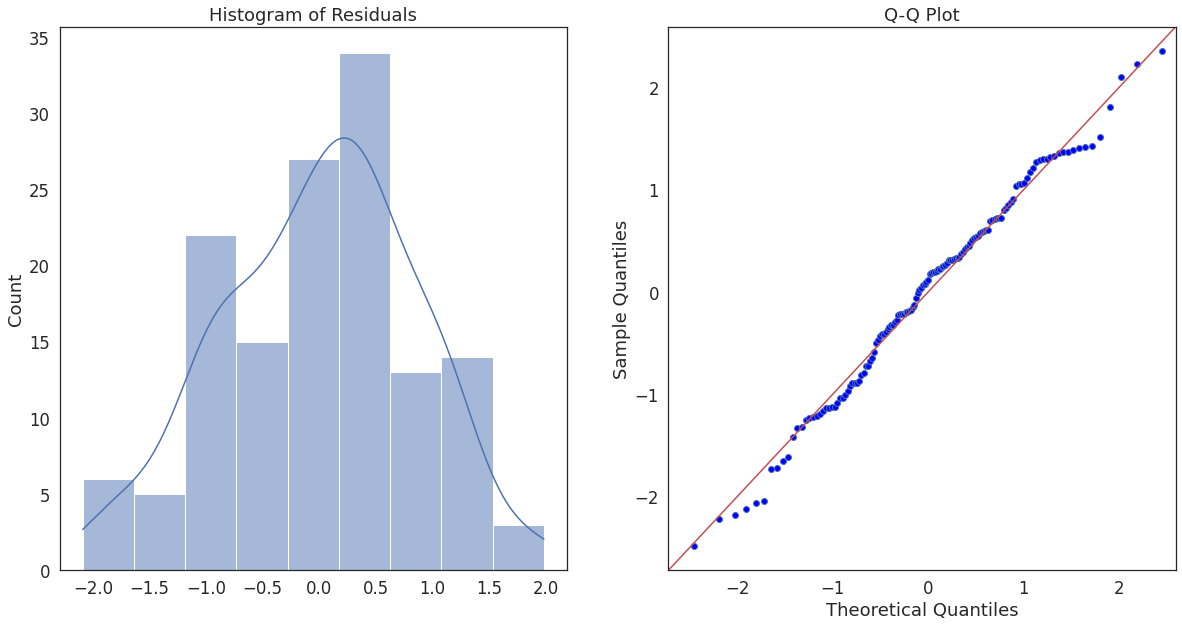


               Unlogged   Logged 
---------------------------------
Intercept      0.069*** -1.494***
               (0.008)  (0.097)  
covid_cases    -0.000   -0.000   
               (0.000)  (0.000)  
R-squared      0.003    0.014    
R-squared Adj. 0.001    0.007    
N              650      139      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
For every additional covid_cases, log crimes increase by -0.0%


In [ ]:
#ORIGINAL MODEL
model = ols('hate_crimes ~ covid_cases', data=df).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

#CREATE THE LOGGED COLUMN
df['logcrimes']=np.log(df['hate_crimes'])

#REMOVE NAN AND INF VALUES (from log0 which is undefined (talk about this in discussion!!!))
df = df[~np.isnan(df['logcrimes'])]
df = df[~np.isinf(df['logcrimes']) | (df['logcrimes'] > 0)]
sns.jointplot(data=df, x='covid_cases', y='logcrimes', kind="reg",  scatter_kws=dict(alpha=0.1), line_kws=dict(color='red'), height=10)

#LOG MODEL
log_model = ols('logcrimes ~  covid_cases', data=df).fit()  # fit a model
log_model_residuals = log_model.resid # get the residuals
log_model_residuals = log_model_residuals[~np.isnan(log_model_residuals)]

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(log_model_residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(log_model_residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

#REGRESSION TABLE COMPARISON
table=summary_col( # create a regression table 
    [model,log_model], # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=['Unlogged','Logged'], # set the name of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table)

#INTERPRETATION OF COEFFICIENT
b1=log_model.params.covid_cases # get the coefficient
exp_b1=np.exp(b1) # exponentiate the coefficient

pct_change=(exp_b1-1)*100 # multiply by 100 to get the percentage change
print('For every additional unit change in **independent variable**, **logged dependent variable** increase by {}%'.format(round(pct_change,2)))

**C. MULTICOLLINEARITY**

Create a correlation matrix to check none have a coefficient > 0.8, then 
calculate VIF and remove columns where VIF is too high

In [ ]:
sns.heatmap(df.corr(), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

* None above 0.8 so satify this assumption

In [ ]:
def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [ ]:
ind_vars=['hate_tweets','hate_crimes','covid_cases', 'StringencyIndex']

vif = drop_column_using_vif_(df[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

# **REGRESSION**

Conduct standard OLS regression (despite the fact we know our data doesn't satisfy the assumptions just to investigate the results)

In [ ]:
model= ols('hate_crimes ~  covid_cases', data=df).fit() # fit the model
print(model.summary()) # print the summary

In [ ]:
model= ols('hate_tweets ~  covid_cases', data=df).fit() # fit the model
print(model.summary()) # print the summary

In [ ]:
model= ols('hate_crimes ~  StringencyIndex', data=df).fit() # fit the model
print(model.summary()) # print the summary

In [ ]:
model= ols('hate_tweets ~  StringencyIndex', data=df).fit() # fit the model
print(model.summary()) # print the summary

In [ ]:
model= ols('hate_crimes ~  hate_tweets', data=df).fit() # fit the model
print(model.summary()) # print the summary

# **PANEL REGRESSION**

Panel regression to account for time and space. First, we do a regression for each month in the period our dat covers, to look at the variation between states. (Only one measurement for each state per month)

In [ ]:
pdf  = pd.read_csv("/content/stringency_final (1).csv")
pdf.head()

In [ ]:
pdf['Date'] = pd.to_datetime(pdf['Date'])

In [ ]:
pdf.dtypes

Adding a month in period column

In [ ]:
pdf['year'] = pd.DatetimeIndex(pdf['Date']).year
pdf['month'] = pd.DatetimeIndex(pdf['Date']).month
pdf['month_year'] = pd.to_datetime(pdf['Date']).dt.to_period('M')

def add_month_in_period(df):
    # Sort the dataframe by year and month
    df = df.sort_values(by=['year', 'month'])
    
    # Find the minimum year and month
    min_year = df['year'].min()
    min_month = df['month'].min()
    
    # Create an empty list to store the month in period values
    month_in_period = []
    
    # Iterate through the dataframe and calculate the month in period for each row
    for i, row in df.iterrows():
        # Calculate the difference in years between the current row and the minimum year
        year_difference = row['year'] - min_year
        # Calculate the difference in months between the current row and the minimum month
        month_difference = (year_difference * 12) + (row['month'] - min_month)
        month_in_period.append(month_difference)
    
    # Add the month in period values to the dataframe as a new column
    df['month_in_period'] = month_in_period
    
    return df
    
pdf = add_month_in_period(pdf)

In [ ]:
pdf.tail()

Do the regression for each 'month in period'

In [ ]:
models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for month in range(1,14):
    pdf2=pdf[pdf['month_in_period']==month] # subset the data to only include the month of interest
    model= ols('hate_crimes ~ StringencyIndex', data=pdf2).fit() # run a regression
    models.append(model) # append the model to the list of models
    names.append(f"Month {str(month)}") # append the name of the model to the list of names

table=summary_col( # create a regression table 
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table

In [ ]:
models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for month in range(1,14):
    pdf2=pdf[pdf['month_in_period']==month]
    model= ols('hate_tweets ~ StringencyIndex', data=pdf2).fit()
    models.append(model) # append the model to the list of models
    names.append(f"Month {str(month)}") # append the name of the model to the list of names

table=summary_col( # create a regression table 
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table

In [ ]:
models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for month in range(1,14):
    pdf2=pdf[pdf['month_in_period']==month]
    model= ols('hate_crimes ~ covid_cases', data=pdf2).fit() 
    models.append(model) # append the model to the list of models
    names.append(f"Month {str(month)}") # append the name of the model to the list of names

table=summary_col( # create a regression table 
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table

In [ ]:
models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for month in range(1,14):
    pdf2=pdf[pdf['month_in_period']==month]
    model= ols('hate_tweets ~ covid_cases', data=pdf2).fit() 
    models.append(model) # append the model to the list of models
    names.append(f"Month {str(month)}") # append the name of the model to the list of names

table=summary_col( # create a regression table 
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table